In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터 불러오기
df = pd.read_excel('공개데이터_18.xlsx')

In [3]:
# 학생 수 관련 데이터 선택
numcls = df.loc[:,'regname':'numcls_f6']

In [4]:
# 관련없는 데이터 삭제
numcls = numcls.drop(['schlevel','schtypename','schgenname','schprin'],axis = 1)

In [5]:
# 서울 학생수를 구하기 위해 서울지역 데이터 선택
seoul_numcls = numcls.loc[numcls['regname']=='서울',:]

In [6]:
seoul_numcls_copy = seoul_numcls.copy()

In [7]:
#서울 지역 각 학년 학생수 합계 셀 만들기 
for i in range(1,7):
    f'numcls_m{i}'
    f'numcls_f{i}'
    seoul_numcls_copy[f'numcls_{i}의학생수'] = seoul_numcls_copy[f'numcls_m{i}'] + seoul_numcls_copy[f'numcls_f{i}']

In [8]:
# 서울 지역 학년별 평균 학급 학생 수 구하기 = 서울 지역 학년별 학생 수 총 합 / 서울 지역 학년별 학급 수 총 합
# num_student = 서울 지역 학년별 평균 학급 학생 수 
num_students = []
for i in range(1,7):
    f'numcls_{i}'
    num_students.append(seoul_numcls_copy[f'numcls_{i}의학생수'].sum(0)/seoul_numcls_copy[f'numcls_{i}'].sum(0))
print(num_students)
grade = ['1학년','2학년','3학년','4학년','5학년','6학년']

[22.571428571428573, 22.938628158844764, 23.09505703422053, 23.268382352941178, 23.017006802721088, 22.691756272401435]


(20.0, 25.0)

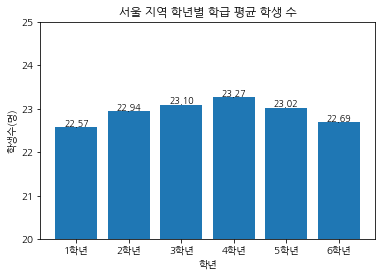

In [10]:
# 학년별 학급 평균 학생 수 그래프 구하기 
import matplotlib.pyplot as plt
plt.bar(grade, num_students)
plt.title('서울 지역 학년별 학급 평균 학생 수')
plt.xlabel('학년')
plt.ylabel('학생수(명)')
for i,v in enumerate(grade):
    plt.text(
        v,
        num_students[i],
        '{:.2f}'.format(num_students[i]),
        fontsize = 9,
        color = 'black',
        horizontalalignment='center',
        verticalalignment='bottom'
    )
plt.ylim(20,25)